## EDA for provider payments (utility) dataset

#### data is read in from psql

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import psycopg2 as pg2

In [3]:
conn = pg2.connect(dbname='medicare', user='postgres')
#cur = conn.cursor()

In [4]:
query = '''
        SELECT *
        FROM util_payments_agg_2013;
        '''

In [5]:
df_util = pd.read_sql_query(query, conn)

In [8]:
df_util.head().T

,0,1,2,3,4
index,0,1,2,3,4
npi,1003000126,1003000134,1003000142,1003000407,1003000423
last_name,ENKESHAFI,CIBULL,KHALIL,GIRARDI,VELOTTA
first_name,ARDALAN,THOMAS,RASHID,DAVID,JENNIFER
middle_initial,None,L,None,J,A
credentials,M.D.,M.D.,M.D.,D.O.,M.D.
gender,M,M,M,M,F
entity_code,I,I,I,I,I
street1,900 SETON DR,2650 RIDGE AVE,4126 N HOLLAND SYLVANIA RD,456 MAGEE AVE,11100 EUCLID AVE
street2,None,EVANSTON HOSPITAL,SUITE 220,None,None


In [14]:
956293 - 100785

855508

In [7]:
df_util.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956293 entries, 0 to 956292
Data columns (total 68 columns):
index                                       956293 non-null int64
npi                                         956293 non-null int64
last_name                                   956275 non-null object
first_name                                  898288 non-null object
middle_initial                              678408 non-null object
credentials                                 873126 non-null object
gender                                      898293 non-null object
entity_code                                 956293 non-null object
street1                                     956291 non-null object
street2                                     392669 non-null object
city                                        956291 non-null object
zip                                         956293 non-null object
state                                       956293 non-null object
country             

In [15]:
# To explain the counts in the charge columns: total entries = 956293, suppress = 100785, difference is 855508 

In [9]:
df_util.describe().T

,count,mean,std,min,25%,50%,75%,max
index,956293,4.781460e+05,2.760582e+05,0.000000e+00,2.390730e+05,4.781460e+05,7.172190e+05,9.562920e+05
npi,956293,1.499823e+09,2.880216e+08,1.003000e+09,1.245563e+09,1.497992e+09,1.750304e+09,1.993000e+09
num_hcpcs,956293,3.354763e+01,3.668820e+01,1.000000e+00,9.000000e+00,2.200000e+01,4.500000e+01,1.110000e+03
num_services,956293,2.637226e+03,3.707956e+04,1.100000e+01,1.980000e+02,5.790000e+02,1.695000e+03,1.196891e+07
num_unique_bene,956293,3.761494e+02,2.921719e+03,1.100000e+01,6.700000e+01,1.770000e+02,4.000000e+02,1.352762e+06
total_submitted_charges,956293,3.316371e+05,2.225272e+06,5.200000e+01,2.921100e+04,1.091662e+05,3.126167e+05,8.138554e+08
total_medicare_allowed_amt,956293,1.216336e+05,6.138467e+05,2.090000e+00,1.365331e+04,4.324796e+04,1.187013e+05,2.155981e+08
total_medicare_payment_amt,956293,9.331302e+04,5.568411e+05,0.000000e+00,1.005876e+04,3.200653e+04,8.902692e+04,2.113041e+08
num_hcpcs_associated_drug_srvc,855508,2.035427e+00,5.711384e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.180000e+02
num_drug_srvc,855508,8.619473e+02,9.206433e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.600000e+01,1.348986e+06


In [12]:
len(df_util['provider_type'].value_counts())

90

In [13]:
df_util['provider_type'].value_counts()

Internal Medicine                           95656
Family Practice                             81187
Nurse Practitioner                          64696
Physician Assistant                         50125
Emergency Medicine                          39285
Physical Therapist                          39265
CRNA                                        37870
Chiropractic                                37061
Anesthesiology                              36535
Diagnostic Radiology                        29337
Mass Immunization Roster Biller             28782
Optometry                                   27900
Obstetrics/Gynecology                       27771
Cardiology                                  22782
Psychiatry                                  22709
Orthopedic Surgery                          21204
General Surgery                             19862
Ophthalmology                               17550
Licensed Clinical Social Worker             15360
Podiatry                                    14789


In [17]:
df_util[['num_unique_bene', 'num_bene_le65', 'num_bene_65to74', 'num_bene_75to84', 'num_bene_ge84']]

,num_unique_bene,num_bene_le65,num_bene_65to74,num_bene_75to84,num_bene_ge84
0,665,120,186,205,154
1,3940,100,1669,1472,699
2,144,76,36,20,12
3,436,65,97,137,137
4,63,35,13,NaN,NaN
5,146,60,56,NaN,NaN
6,539,28,161,193,157
7,306,58,134,73,41
8,14,NaN,NaN,0,0
9,41,NaN,25,NaN,NaN


### Nulls in beneficiary age counts due to counts being less than 11
#### Impute with number missing / number of nulls

### Explore male/female data

In [18]:
df_util[['num_unique_bene', 'num_female', 'num_male']]

,num_unique_bene,num_female,num_male
0,665,359,306
1,3940,2025,1915
2,144,72,72
3,436,265,171
4,63,63,0
5,146,80,66
6,539,310,229
7,306,168,138
8,14,NaN,NaN
9,41,30,11


In [22]:
np.sum(df_util['num_male'])/np.sum(df_util['num_female'])

0.7193915367560691

#### Ratio of male: female is .72. Impute missings on that ratio. (except for female specific doctors? obgyn, etc...)

### Explore Race nulls

```
num_non_his_white                           629147 non-null float64   
num_african_american                        319244 non-null float64  
num_asian                                   165528 non-null float64  
num_hispanic                                250582 non-null float64  
num_american_indian                         263435 non-null float64  
num_no_race                                 126199 non-null float64
```

In [23]:
df_util[['num_unique_bene', 'num_non_his_white', 'num_african_american', 'num_asian', 'num_hispanic', 'num_american_indian', 'num_no_race']]

,num_unique_bene,num_non_his_white,num_african_american,num_asian,num_hispanic,num_american_indian,num_no_race
0,665,639,14,NaN,NaN,0,NaN
1,3940,3736,53,41,71,0,39
2,144,109,NaN,NaN,NaN,NaN,NaN
3,436,NaN,NaN,NaN,NaN,NaN,NaN
4,63,NaN,NaN,NaN,NaN,NaN,NaN
5,146,100,NaN,NaN,23,NaN,NaN
6,539,495,22,NaN,NaN,NaN,NaN
7,306,295,NaN,NaN,NaN,0,NaN
8,14,NaN,NaN,NaN,NaN,NaN,NaN
9,41,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
race_list = ['num_unique_bene', 'num_non_his_white', 'num_african_american', \
             'num_asian', 'num_hispanic', 'num_american_indian', 'num_no_race']

In [32]:
for n in race_list:
    race_count = np.sum(df_util[n])
    print n
    print 'total count:', race_count
    print 'percentage: ', race_count / np.sum(df_util['num_unique_bene'])

num_unique_bene
total count: 359709000
percentage:  1
num_non_his_white
total count: 263081956.0
percentage:  0.731374405422
num_african_american
total count: 29924440.0
percentage:  0.0831906902524
num_asian
total count: 4969493.0
percentage:  0.0138153146015
num_hispanic
total count: 16212778.0
percentage:  0.0450719275859
num_american_indian
total count: 928858.0
percentage:  0.00258224842859
num_no_race
total count: 1500853.0
percentage:  0.00417240880823


#### Higher number of minorities missing from data b/c they're more likely to be lower in numbers and therefore represented as null (only null if < 11). Impute missing with overall population frequency?
#### Also possible that minorities aren't on medicare for some other reason

## Explore disease percentage nulls

```
pcnt_alzheimers_dementia                    633056 non-null float64
pcnt_asthma                                 603736 non-null float64
pcnt_artrial_fibrillation                   650309 non-null float64
pcnt_cancer                                 646550 non-null float64
pcnt_chronic_kidney                         752279 non-null float64
pcnt_chronic_obstructive_pulmonary          699972 non-null float64
pcnt_depression                             800406 non-null float64
pcnt_diabetes                               822613 non-null float64
pcnt_heart_failure                          721405 non-null float64
pcnt_hyperlipidemia                         886581 non-null float64
pcnt_hypertension                           906330 non-null float64
pcnt_ischemic_heart                         819432 non-null float64
pcnt_osteoporosis                           604753 non-null float64
pcnt_rheumatoid_arthritis_osteoarthirtis    857849 non-null float64
pcnt_schizophrenia_psychotic                503777 non-null float64
pcnt_stroke                                 533130 non-null float64
```

In [58]:
disease_list = df_util.columns[-17:-1]

In [56]:
type(disease_list)

pandas.core.index.Index

In [61]:
pd.concat([df_util['num_unique_bene'],df_util[disease_list]], axis=1)

,num_unique_bene,pcnt_alzheimers_dementia,pcnt_asthma,pcnt_artrial_fibrillation,pcnt_cancer,pcnt_chronic_kidney,pcnt_chronic_obstructive_pulmonary,pcnt_depression,pcnt_diabetes,pcnt_heart_failure,pcnt_hyperlipidemia,pcnt_hypertension,pcnt_ischemic_heart,pcnt_osteoporosis,pcnt_rheumatoid_arthritis_osteoarthirtis,pcnt_schizophrenia_psychotic,pcnt_stroke
0,665,32,13,26,16,56,41,38,54,50,70,75,67,13,47,16,20
1,3940,8,4,12,13,14,8,11,20,11,57,60,29,8,36,1,4
2,144,11,13,NaN,8,22,23,57,51,19,53,72,40,NaN,74,NaN,NaN
3,436,30,11,23,14,51,44,43,43,50,61,75,59,17,38,17,10
4,63,NaN,NaN,NaN,NaN,NaN,NaN,41,30,NaN,43,57,22,NaN,30,NaN,0
5,146,8,12,10,18,40,24,41,40,18,49,75,34,11,40,NaN,NaN
6,539,38,3,14,14,25,21,12,31,18,75,73,41,13,53,NaN,4
7,306,9,5,8,10,13,9,17,24,10,62,67,30,12,27,NaN,NaN
8,14,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,66,NaN,NaN,37,NaN,NaN


#### Nulls result from raw count being less than 11, might be hard to impute because there's a lot of missing and it doesn't necessarily add to 1

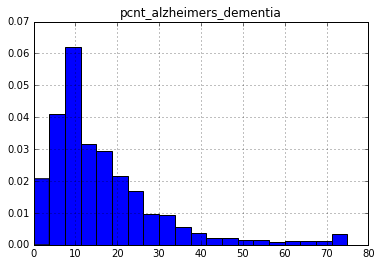

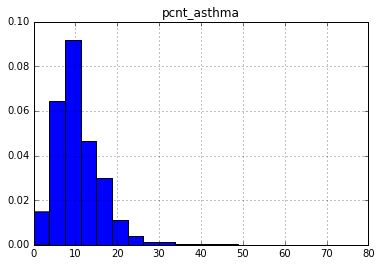

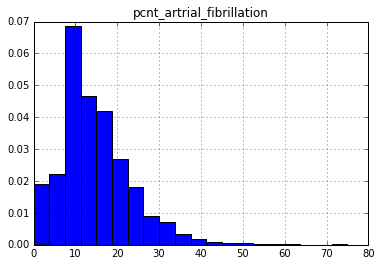

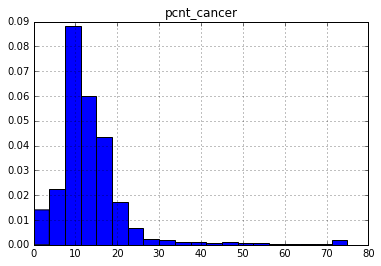

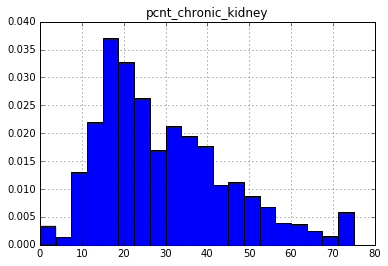

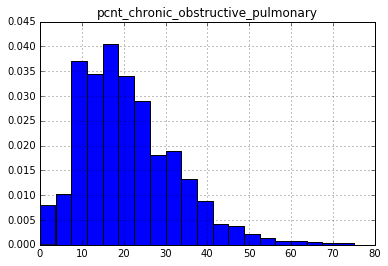

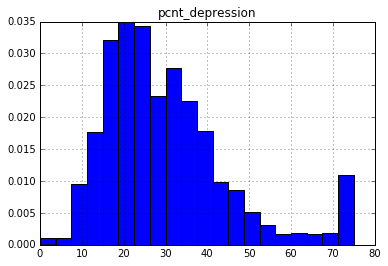

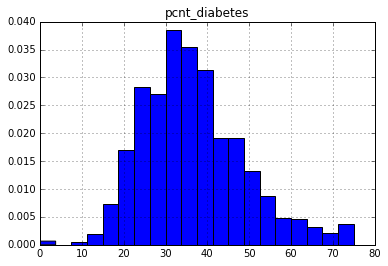

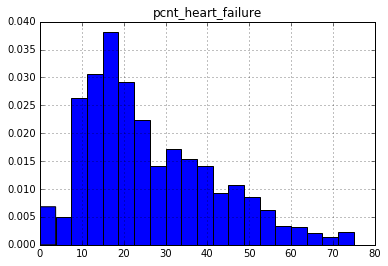

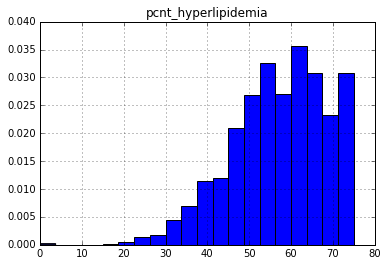

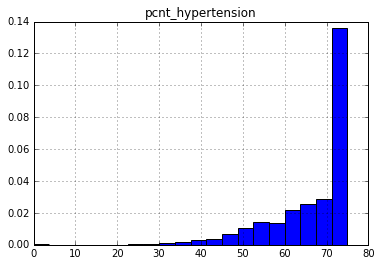

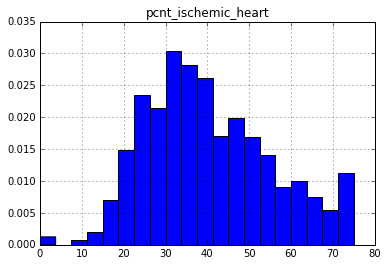

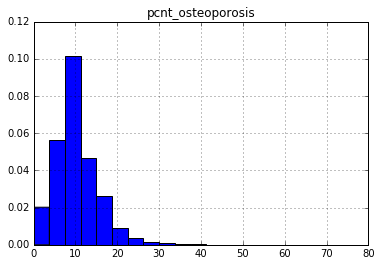

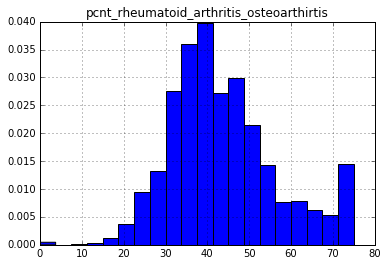

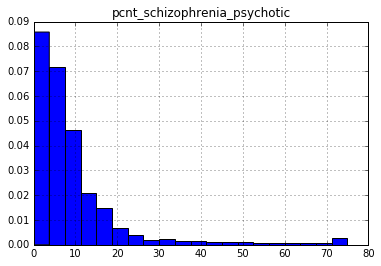

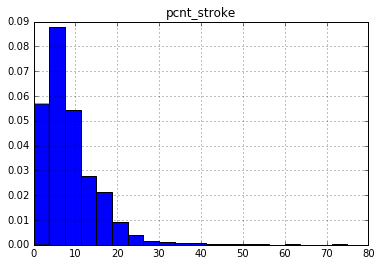

In [74]:
for n in disease_list:
    df_util[n].hist(bins=20, normed=True)
    plt.title(n)
    plt.show()